In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.7.0'

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images ,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
jprint(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_images, valid_images, train_labels,valid_labels = train_test_split(train_images, train_labels, 
                                                                          random_state=0,
                                                                          test_size=0.1)

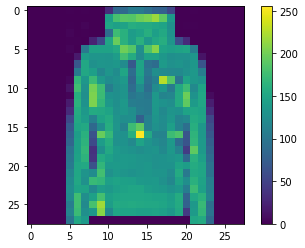

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
Input = tf.keras.layers.Input(shape=(28,28)) # Định nghĩa input shape cho model
Flatten = tf.keras.layers.Flatten()(Input)   # Duỗi thẳng ảnh ra thành 1 vector
Dense1 = tf.keras.layers.Dense(units=600, activation="relu")(Flatten) # Định nghĩa số node cho lớp FC, dùng activation là relu
Dense2 = tf.keras.layers.Dense(units=300, activation="relu")(Dense1)
Output = tf.keras.layers.Dense(units=len(np.unique(train_labels)), activation="softmax")(Dense2) # Đây là lớp classifier của model, với số nodes đúng bằng số labels 

model=tf.keras.models.Model(inputs=Input, outputs=Output)

In [ ]:
#In thử model ra để xem cấu trúc
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 654,310
Trainable params: 654,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-5), loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=["accuracy"])
#optimizer là chọn optimizer cho model
#loss là chọn loss function cho model
#metrics là chọn metrics cho model

In [ ]:
# model.compile(optimizer='adam',
#              loss=tf.keras.losses.sparse_categorical_crossentropy,
#              metrics=["accuracy"])

In [ ]:
history=model.fit(x=train_images, y=train_labels,
                  epochs=20,
                  verbose=1,
                  validation_data=(valid_images,valid_labels))

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 6.2405 - accuracy: 0.7382 - val_loss: 3.0986 - val_accuracy: 0.7733
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3204 - accuracy: 0.7958 - val_loss: 2.0687 - val_accuracy: 0.7967
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 1.6075 - accuracy: 0.8111 - val_loss: 1.6195 - val_accuracy: 0.8015
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 1.2391 - accuracy: 0.8206 - val_loss: 1.4017 - val_accuracy: 0.8070
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 1.0125 - accuracy: 0.8283 - val_loss: 1.2116 - val_accuracy: 0.8145
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.8630 - accuracy: 0.8353 - val_loss: 1.1139 - val_accuracy: 0.8142
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.7525 - accuracy: 0.8424 - val_loss: 1.0203 - val_accuracy:

In [ ]:
#Xem độ chính xác trên tập test
evaluation=model.evaluate(test_images, test_labels)
print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8290 - accuracy: 0.8290
Model có độ chính xác là 0.8289999961853027 và loss là 0.8290102481842041


# 1. Hãy tạo một model có cấu trúc sau và train thử

In [ ]:
Input = tf.keras.layers.Input(shape=(28,28)) # Định nghĩa input shape cho model
Flatten = tf.keras.layers.Flatten()(Input)   # Duỗi thẳng ảnh ra thành 1 vector
Dense1 = tf.keras.layers.Dense(units=700, activation="relu")(Flatten) # Định nghĩa số node cho lớp FC, dùng activation là relu
Dense2 = tf.keras.layers.Dense(units=600, activation="relu")(Dense1)
Dense3 = tf.keras.layers.Dense(units=500, activation="relu")(Dense2)
Dense4 = tf.keras.layers.Dense(units=400, activation="relu")(Dense3)
Dense5 = tf.keras.layers.Dense(units=300, activation="relu")(Dense4)
Output = tf.keras.layers.Dense(units=len(np.unique(train_labels)), activation="softmax")(Dense5) # Đây là lớp classifier của model, với số nodes đúng bằng số labels 

model=tf.keras.models.Model(inputs=Input, outputs=Output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 700)               549500    
_________________________________________________________________
dense_4 (Dense)              (None, 600)               420600    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_6 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               1203

# 2. Nêu cách tính số Param 

Ta tính theo công thức: param = output * (input + 1) $\\$

549500 = 700 * (784 + 1)

420600 = 600 * (700 + 1)

300500 = 500 * (600 + 1)

200400 = 400 * (500 + 1)

120300 = 300 * (400 + 1)

3010 = 10 * (300 + 1)

Total 549500 + 420600 + 300500 + 200400 + 120300 + 3010 = 1,549,310

# 3. Tính độ chính xác trên tập test

In [ ]:
# model.compile(optimizer='adam',
#              loss=tf.keras.losses.sparse_categorical_crossentropy,
#              metrics=["accuracy"])
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-5), loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=["accuracy"])
#optimizer là chọn optimizer cho model
#loss là chọn loss function cho model
#metrics là chọn metrics cho model


In [ ]:
history=model.fit(x=train_images, y=train_labels,
                  epochs=20,
                  verbose=1,
                  validation_data=(valid_images,valid_labels))

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 1.9818 - accuracy: 0.7304 - val_loss: 1.2388 - val_accuracy: 0.7550
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.9037 - accuracy: 0.7976 - val_loss: 0.8695 - val_accuracy: 0.7967
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.7048 - accuracy: 0.8174 - val_loss: 0.7809 - val_accuracy: 0.8068
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5977 - accuracy: 0.8317 - val_loss: 0.8674 - val_accuracy: 0.7758
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5318 - accuracy: 0.8409 - val_loss: 0.7103 - val_accuracy: 0.8122
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4855 - accuracy: 0.8494 - val_loss: 0.6720 - val_accuracy: 0.8113
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4495 - accuracy: 0.8568 - val_loss: 0.6135 - val_accuracy:

In [ ]:
#Xem độ chính xác trên tập test
evaluation=model.evaluate(test_images, test_labels)
print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.5456 - accuracy: 0.8413
Model có độ chính xác là 0.8413000106811523 và loss là 0.5456209182739258
